Choosing custom anchors instead of the YOLOv3 defaults

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline

In [3]:
cd ../mini-metro/ml_train/station_detector/pytorch/

/home/ubuntu/mini-metro/ml_train/station_detector/pytorch


In [7]:
with open('data/train.txt', "r") as file:
    img_files = file.readlines()
    
    
wh = []

for img_file in img_files:
    img_path = img_file.strip()
    dims = imread(img_path).shape
    img_w, img_h = dims[1], dims[0]
    
    label_path = img_path.replace("images", "labels").replace(".png", ".txt").replace(".jpg", ".txt")
    for line in Path(label_path).read_text().split('\n'):
        if line:
            box_w = float(line.split()[3]) * img_w
            box_h = float(line.split()[4]) * img_h
            wh.append((img_path, img_w, img_h, box_w, box_h))

In [8]:
wh[0]

('data/images/frame_1532300508.4565086.png', 794, 560, 45.0, 43.0)

In [10]:
w = [float(line[3]) for line in wh]
h = [float(line[4]) for line in wh]

Get default anchors from config

In [ ]:
wa = [10, 16, 33, 30, 62, 59, 116, 156, 373]
ha = [13, 30, 23, 61, 45, 119, 90, 198, 326]

Plotting distribution of box w vs. h

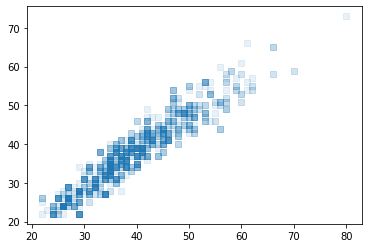

In [18]:
_, ax = plt.subplots()
ax.scatter(w, h, alpha=0.1, marker='s')
#ax.scatter(wa, ha, marker='s')

Annotating existing default boxes hardcoded in YOLO config (calculated from clustering on training dataset (COCO?)

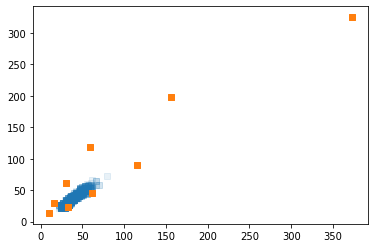

In [20]:
_, ax = plt.subplots()
ax.scatter(w, h, alpha=0.1, marker='s')
ax.scatter(wa, ha, marker='s')